## Sentiment Analysis Using Multinomial Naive Bayes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Read-in the Dataset

In [ ]:
import pandas as pd
import codecs

with codecs.open('g:/mydata/social_media/Final_Social_Dataset.csv', "r", encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_csv(fdata, sep=',', usecols=[0,1])

In [ ]:
df.head(3)

,comments,sentiments
0,You can connect to the world but become irrele...,negative
1,internet and social media keeps us updated,positive
2,There are many activities on social media whic...,positive


In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
# know about the length of acquired dataset
len(df)

3779

In [ ]:
df.head(2)

,comments,sentiments
0,You can connect to the world but become irrelevent to your own surrounding,negative
1,internet and social media keeps us updated,positive


In [ ]:
# know about the attributes of the dataset
df.columns

Index(['comments', 'sentiments'], dtype='object')

In [ ]:
# Learning the path
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [ ]:
import wordcloud

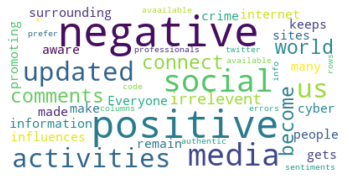

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator


all_words = df
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(all_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig("d:/cpd2019/cloud.png")
plt.show()

In [ ]:
#  know about the total number of entries under each attribute
df.count()

comments      3779
sentiments    3779
dtype: int64

In [ ]:
# How many sentiment entries are there
df.sentiments.count()

3779

In [ ]:
df.dropna(inplace=True)
len(df)

3779

In [ ]:
#df.dropna(subset=['tweet', 'sentiment'])

In [ ]:
len(df)

3779

In [ ]:
# df['tweet_length']= df.tweet.apply(len)
# df

In [ ]:
# How many for each category are in the dataset

# df.sentiments.value_counts()

In [ ]:
# df.tweets.value_counts()

## Data Cleaning
1. To Normalize the dataset
3. To extract basic features from given dataset

In [ ]:
# converting to lower case
df["comments"] = df["comments"].apply(str.lower)
#df["comments"] = df["comments"].str.lower()
df.head()

,comments,sentiments
0,you can connect to the world but become irrelevent to your own surrounding,negative
1,internet and social media keeps us updated,positive
2,there are many activities on social media which are made to make us aware,positive
3,some activities have more negative influences,negative
4,everyone gets information,positive


In [ ]:
# To remove puntuations
df["comments"] = df["comments"].str.replace('[^\w\s]', '')
df.head()

,comments,sentiments
0,you can connect to the world but become irrelevent to your own surrounding,negative
1,internet and social media keeps us updated,positive
2,there are many activities on social media which are made to make us aware,positive
3,some activities have more negative influences,negative
4,everyone gets information,positive


In [ ]:
import nltk

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)
len(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [ ]:
for word in stopword_list:
    df["comments"] = df["comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword_list)]))

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df["comments"] = df["comments"].apply(stemmer.stem)
df.head(2)

,comments,sentiments
0,connect world become irrelevent surround,negative
1,internet social media keeps us upd,positive


In [ ]:
text = ['travelling', 'travelled', 'traveller', 'travels']
for w in text:
    print(stemmer.stem(w))

travel
travel
travel
travel


In [ ]:
df["df_after_preprocessing"] = df.comments.apply(len)
df.head()

,comments,sentiments,df_after_preprocessing
0,connect world become irrelevent surround,negative,40
1,internet social media keeps us upd,positive,34
2,many activities social media made make us awar,positive,46
3,activities negative influ,negative,25
4,everyone gets inform,positive,20


In [ ]:
from sklearn.model_selection import train_test_split
X = df.comments
y = df.sentiments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
#X_train

In [ ]:
#X_test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
term_matrix = cv.fit_transform(X_train)
term_matrix = term_matrix.toarray()

In [ ]:
# cv.get_feature_names()

In [ ]:
len(cv.get_feature_names())

3146

In [ ]:
vocab_cols = cv.get_feature_names()

In [ ]:
df2 = pd.DataFrame(term_matrix, columns=vocab_cols)
df2.head()

,100,1000,14,17,18,188,2006,2014,2018,247,...,young,younger,youngst,youngsters,youre,youth,youtub,youtube,zero,ziada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_vectorized = cv.transform(X_train)
X_test_vectorized = cv.transform(X_test)

In [ ]:
type(X_test_vectorized)

scipy.sparse.csr.csr_matrix

In [ ]:
X_train_vectorized.shape

(3023, 3146)

In [ ]:
#print(X_train_vectorized)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
predictions = mnb.predict(X_test_vectorized)

In [ ]:
# predictions

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ", accuracy_score(y_test, predictions)*100)

Accuracy Score is:  75.92592592592592


In [ ]:
print(mnb.predict(cv.transform(["social media"])))

['positive']


In [ ]:
print(mnb.predict(cv.transform(["twitter"])))

['positive']


In [ ]:
print(mnb.predict(cv.transform(["there is no peace in south punjab"])))

[' negative']


In [ ]:
print(mnb.predict(cv.transform(["wie heissen sie"])))

['positive']
